# KAGGLE TITANIC PROJECT (0.70095% CORRECT)
#### THE CHALLENGE
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### FIELDS DESCRIPTION
Survived - Survival (0 = No; 1 = Yes)
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
SibSp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### IMPORTING LIBRARIES

In [393]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#### CREATING DATAFRAME

In [394]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df_train = train.copy()
df_test = test.copy()

#### DATA CLEANING, PREPROCESSING AND EXPLORATORY ANALYSIS

In [395]:
df_train.shape

(891, 12)

In [396]:
df_test.shape

(418, 11)

In [397]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [398]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [399]:
df_train.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [400]:
df_train.select_dtypes(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [401]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [402]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### FILLING NAN VALUES IN AGE COLUMN WITH THE MEAN VALUE


In [403]:
df_train['Age'] = df_train['Age'].fillna(np.mean(df_train['Age']))
df_test['Age'] = df_test['Age'].fillna(np.mean(df_test['Age']))

##### DROPPING CABIN COLUMN

In [404]:
df_train.drop(['Cabin'], inplace=True, axis=1)
df_test.drop(['Cabin'], inplace=True, axis=1)

##### TURNING CATEGORICAL EMBARKED COLUMN TO NUMERICAL AND FILLING NANs

In [405]:
# df['Embarked'] = pd.factorize(df['Embarked'])[0]
df_train['Embarked'] = df_train['Embarked'].fillna(method='ffill', axis=0).fillna('C')
df_test['Embarked'] = df_test['Embarked'].fillna(method='ffill', axis=0).fillna('C')

##### DROPPING 'NAME', 'FARE' AND TICKET COLUMNS
In my opinion, these columns are unimportant for our future model and some of them will add some noise to it

In [406]:
df_train.drop(['Name'], inplace=True, axis=1)
df_train.drop(['Fare'], inplace=True, axis=1)
df_train.drop(['Ticket'], inplace=True, axis=1)
df_test.drop(['Name'], inplace=True, axis=1)
df_test.drop(['Fare'], inplace=True, axis=1)
df_test.drop(['Ticket'], inplace=True, axis=1)

##### TURNING 'SEX' AND 'EMBARKED' COLUMN FROM CATEGORICAL TO NUMERICAL
This is needed to add more information for our model in the future

In [407]:
df_train['Sex'] = pd.factorize(df_train['Sex'])[0]
df_train['Embarked'] = pd.factorize(df_train['Embarked'])[0]
df_test['Sex'] = pd.factorize(df_test['Sex'])[0]
df_test['Embarked'] = pd.factorize(df_test['Embarked'])[0]

In [408]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
dtype: object

In [409]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
dtype: object

##### PLOTS FOR ALL COLUMNS

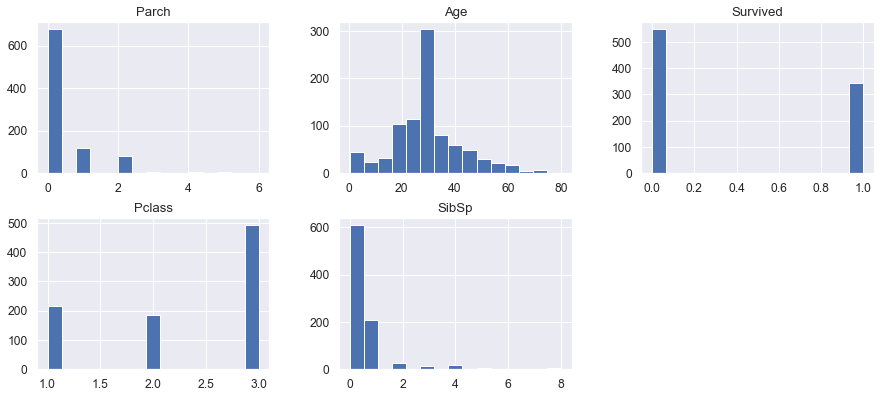

In [410]:
numerical={'Survived', 'Pclass', 'Age', 'SibSp', 'Parch'}
df_train[numerical].hist(bins=15, figsize=(15, 10), layout=(3, 3));

##### DETAILED PLOTS OF ALL COLUMNS

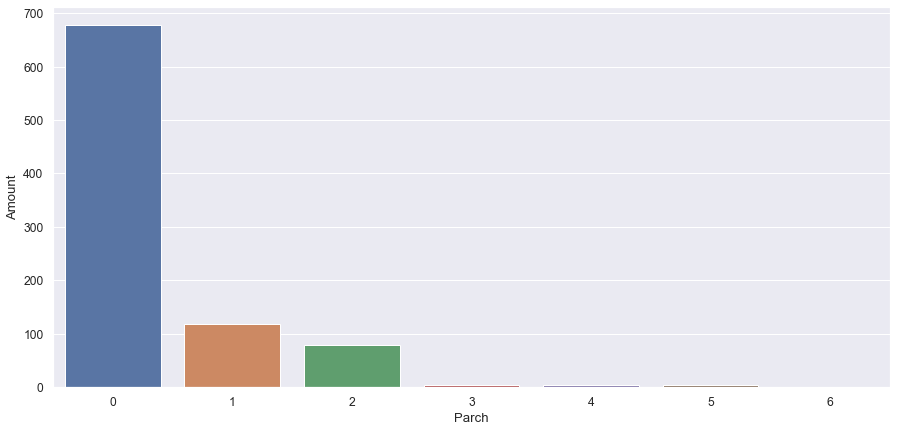

In [411]:
sns.countplot(x=df_train['Parch']).set(xlabel='Parch', ylabel='Amount');

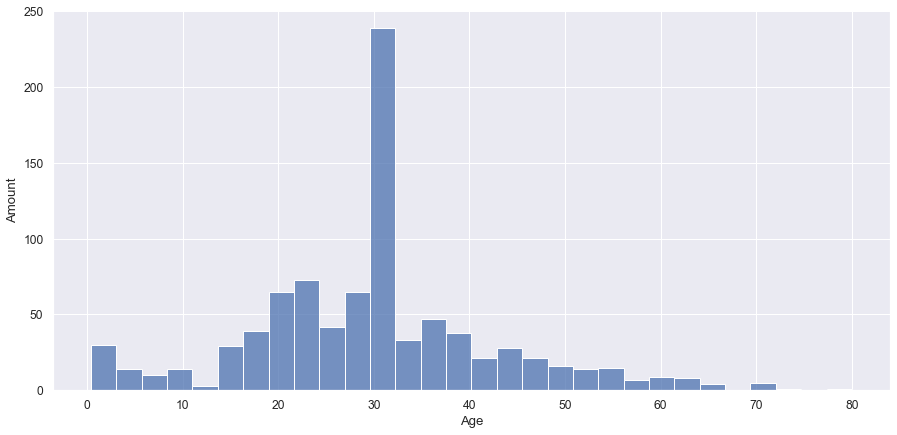

In [412]:
sns.histplot(df_train['Age']).set(xlabel='Age', ylabel='Amount');

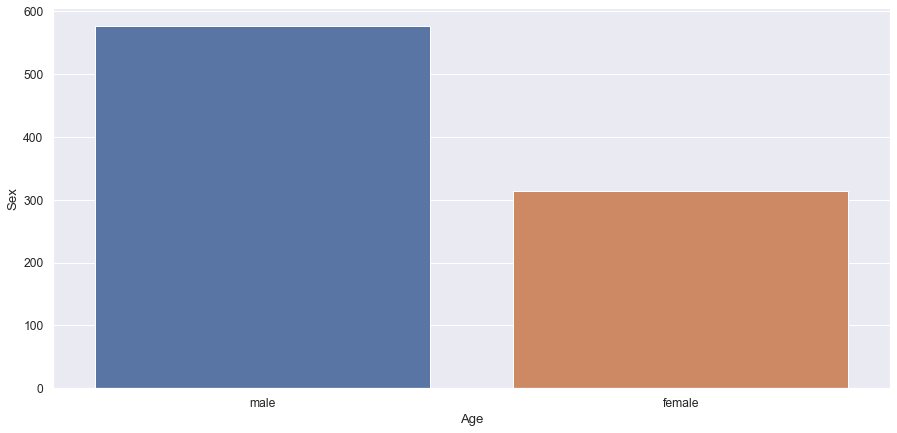

In [413]:
sns.countplot(x=train['Sex']).set(xlabel='Age', ylabel='Sex');

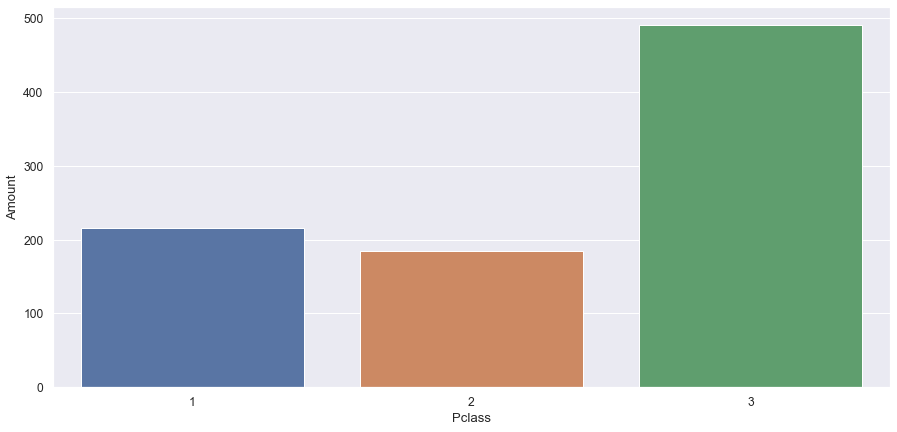

In [414]:
sns.countplot(x=df_train['Pclass']).set(xlabel='Pclass', ylabel='Amount');

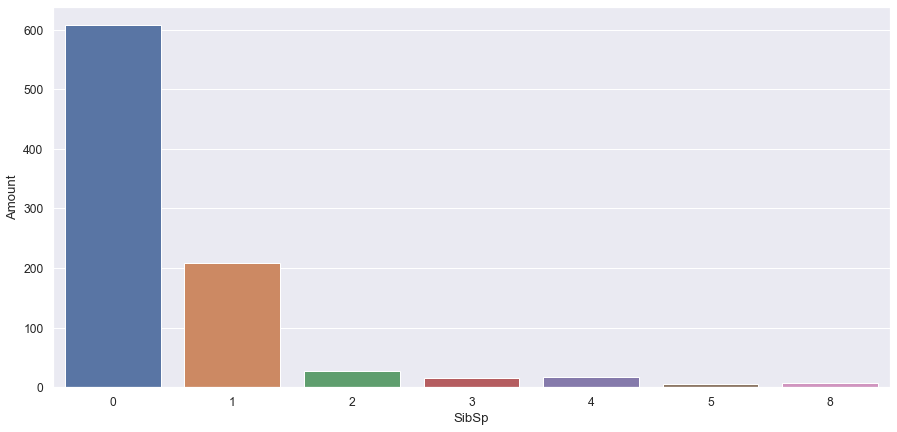

In [415]:
sns.countplot(x=df_train['SibSp']).set(xlabel='SibSp', ylabel='Amount');

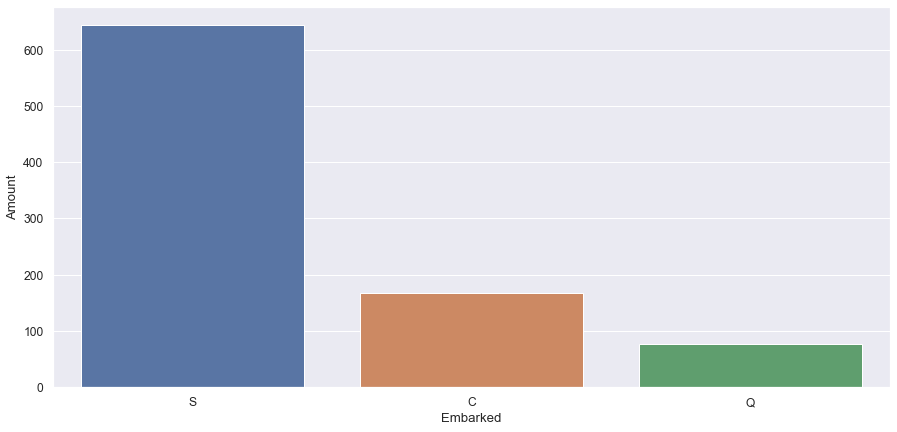

In [416]:
sns.countplot(x=train['Embarked']).set(xlabel='Embarked', ylabel='Amount');

#### RELATIONSHIPS BETWEEN COLUMNS USING SCATTERPLOTS

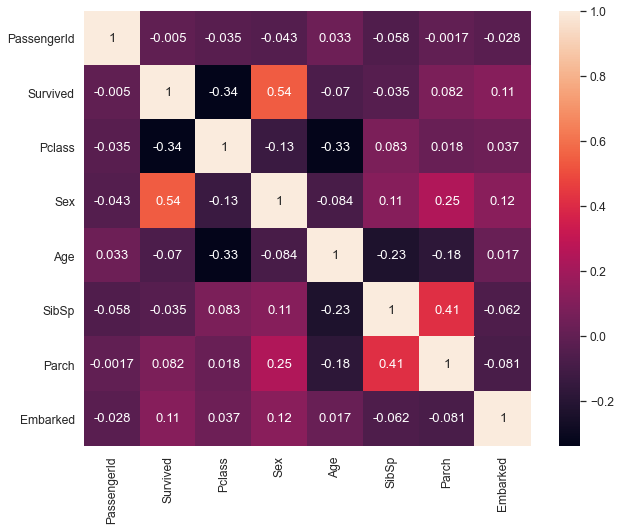

In [417]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_train.corr(), annot=True);

#### RANDOM FOREST REGRESSION MODEL

In [420]:
features = {'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'}
train_X = df_train[features]
train_y = df_train.Survived
test_X = df_test[features]

In [421]:
rfr_model = RandomForestRegressor()
rfr_model.fit(train_X, train_y)
predictions_float = rfr_model.predict(test_X)
predictions_int = predictions_float.astype(int)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions_int})
output.to_csv('submission.csv', index=False)
print("SUCCESS")

SUCCESS
